In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
task_folders = ["results/n_200_fgsm(0.1)", "results/alpha0.5_ni10_n200"]

# success ratio

In [4]:
import json

In [5]:
values = dict()
for task_folder in task_folders:
    with open(os.path.join(task_folder, "success_ratio.json"),"r") as f:
        values.update(json.load(f))
values

{'fgsm': 0.315,
 'dlfuzz': 0.575,
 'lava_vae_forward_gradient': 0.505,
 'lava_vae_bp_gradient': 0.49,
 'lava_vae_vanilla': 0.49,
 'lava_cae_forward_gradient': 0.35,
 'lava_cae_bp_gradient': 0.355,
 'lava_cae_vanilla': 0.355,
 'lava_cvae_forward_gradient': 0.73,
 'lava_cvae_bp_gradient': 0.73,
 'lava_cvae_vanilla': 0.09}

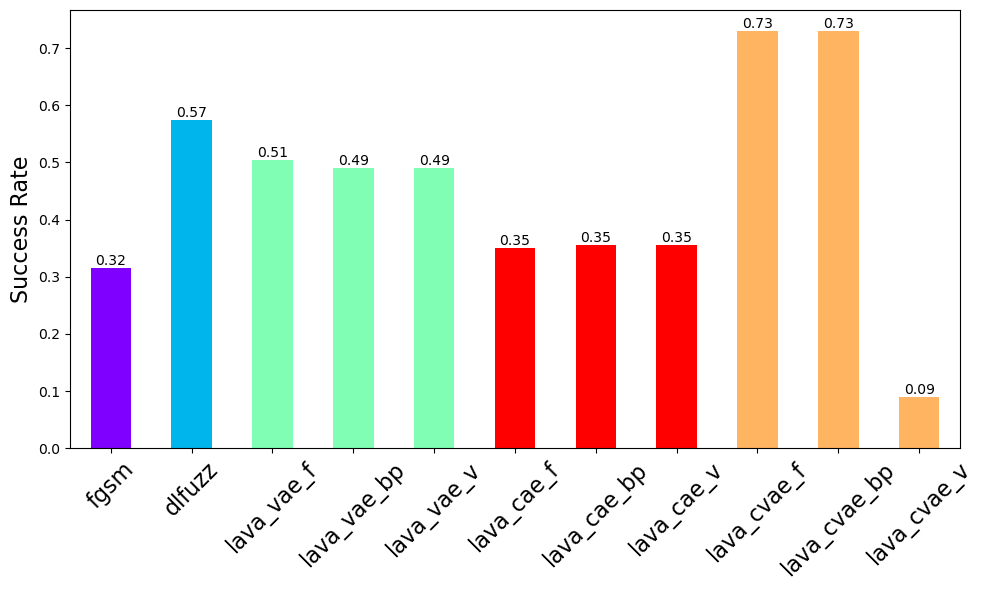

In [12]:
# Convert the dictionary to a pandas Series
values_series = pd.Series(values)

# Rename columns according to the specified rules
values_series.index = values_series.index.str.replace('_forward_gradient', '_f')
values_series.index = values_series.index.str.replace('_bp_gradient', '_bp')
values_series.index = values_series.index.str.replace('_vanilla', '_v')

# Define a more detailed colormap for different categories
cmap = cm.get_cmap('rainbow', 5)
color_mapping = {
    'fgsm': cmap(0),
    'dlfuzz': cmap(1),
    'f': cmap(2),
    'bp': cmap(3),
    'v': cmap(4)
}

# Define colors using the colormap based on the categories
colors = []
for col in values_series.index:
    if col == 'fgsm' or col == 'dlfuzz':
        colors.append(color_mapping[col])
    elif "cvae" in col:
        colors.append(color_mapping['bp'])
    elif "vae" in col:
        colors.append(color_mapping['f'])
    elif 'cae' in col:
        colors.append(color_mapping['v'])


# Plotting the values as a bar chart without the prefix
plt.figure(figsize=(10, 6))
bars = values_series.plot(kind='bar', color=colors)
plt.ylabel('Success Rate', fontsize=16)
#plt.xlabel('Algorithm')
plt.xticks(rotation=45, fontsize=16)

# Adding the value labels on top of the bars
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.2f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom')

plt.tight_layout()
plt.savefig('success_rate_all.pdf')
plt.show()

In [6]:
import pandas as pd

In [7]:
dfs=[]
for task_folder in task_folders:
    dfs.append(pd.read_csv(os.path.join(task_folder, "results.csv")))

In [8]:
df = pd.concat(dfs, axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 68 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             178 non-null    int64  
 1   index_in_dataset                  178 non-null    int64  
 2   t_fgsm                            178 non-null    float64
 3   t_dlfuzz                          178 non-null    float64
 4   kl_fgsm                           105 non-null    float64
 5   kl_dlfuzz                         157 non-null    float64
 6   ws_fgsm                           105 non-null    float64
 7   ws_dlfuzz                         157 non-null    float64
 8   js_fgsm                           105 non-null    float64
 9   js_dlfuzz                         157 non-null    float64
 10  mse_fgsm                          105 non-null    float64
 11  mse_dlfuzz                        157 non-null    float64
 12  index   

# average_time

fgsm            0.017664
dlfuzz          0.791622
lava_vae_f      1.122520
lava_vae_bp     0.474660
lava_vae_v      0.467391
lava_cae_f      1.701128
lava_cae_bp     0.586407
lava_cae_v      0.584384
lava_cvae_f     0.776728
lava_cvae_bp    0.274520
lava_cvae_v     0.701237
dtype: float64


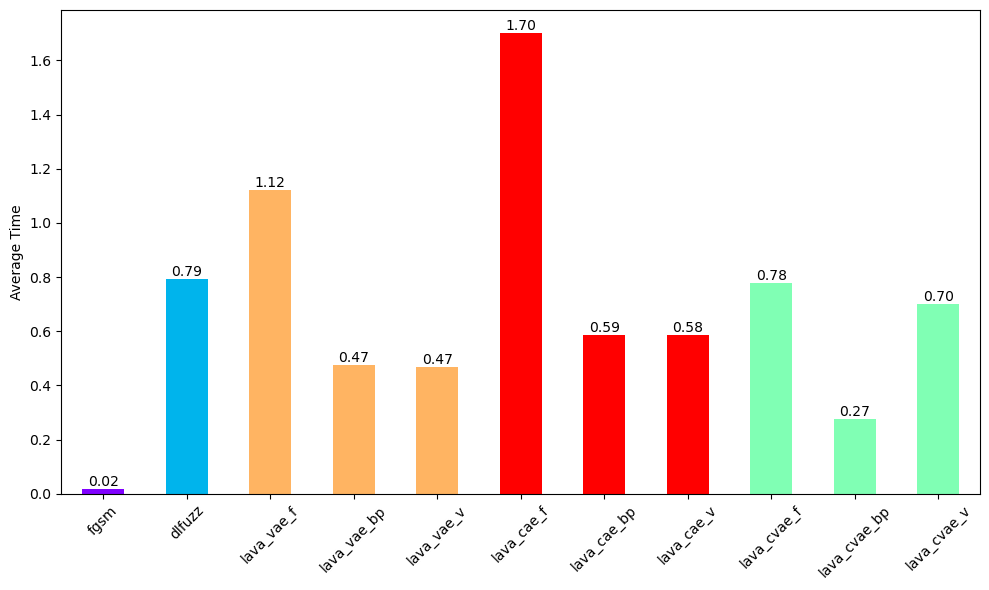

In [14]:
# Assuming df is the DataFrame you provided

# Define the time columns for normalization
time_columns = [col for col in df.columns if col.startswith("t_")]

# Calculate the average time for each algorithm
average_times = df[time_columns].mean()
average_times.index = average_times.index.str.replace('t_', '')
# Rename columns according to the specified rules
average_times.index = values_series.index.str.replace('_forward_gradient', '_f')
average_times.index = values_series.index.str.replace('_bp_gradient', '_bp')
average_times.index = values_series.index.str.replace('_vanilla', '_v')

# Print the average times
print(average_times)

# Define a more detailed colormap for different categories
cmap = cm.get_cmap('rainbow', 5)
color_mapping = {
    'fgsm': cmap(0),
    'dlfuzz': cmap(1),
    'f': cmap(2),
    'bp': cmap(3),
    'v': cmap(4)
}

# Define colors using the colormap based on the categories
colors = []
for col in values_series.index:
    if col == 'fgsm' or col == 'dlfuzz':
        colors.append(color_mapping[col])
    elif 'cvae' in col:
        colors.append(color_mapping['f'])
    elif 'vae' in col:
        colors.append(color_mapping['bp'])
    elif 'cae' in col:
        colors.append(color_mapping['v'])

# Plotting the values as a bar chart without the prefix
plt.figure(figsize=(10, 6))
bars = average_times.plot(kind='bar', color=colors)
plt.ylabel('Average Time')
#plt.xlabel('Algorithm')
plt.xticks(rotation=45)

# Adding the value labels on top of the bars
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.2f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/bachelor/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


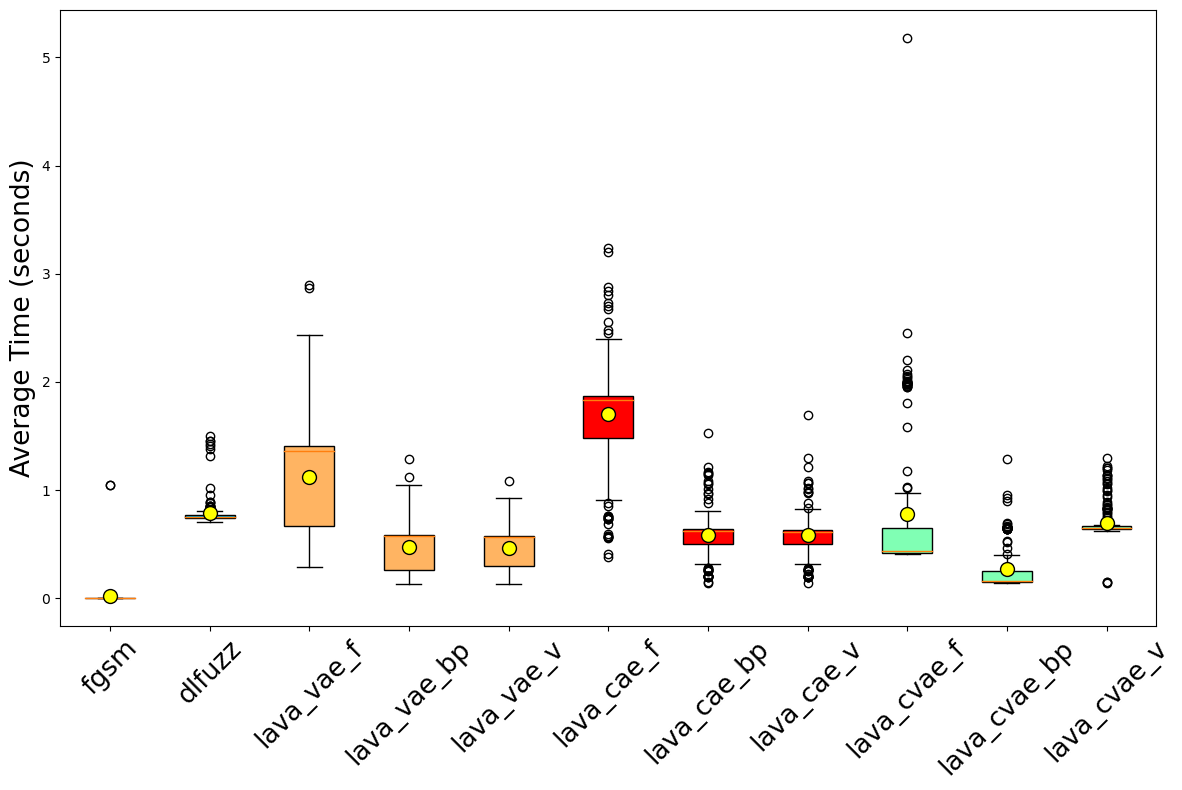

In [13]:

# Create a box plot for the time columns
plt.figure(figsize=(12, 8))
box_plot = plt.boxplot([df[col].dropna() for col in time_columns], patch_artist=True, showmeans=True,
                       meanprops={"marker": "o", 
                                  "markerfacecolor": "yellow", 
                                  "markeredgecolor": "black", 
                                  "markersize": 10},
                       labels=[col.replace('t_', '').replace('_forward_gradient', '_f').replace('_bp_gradient', '_bp').replace('_vanilla', '_v') for col in time_columns])

# Customizing box plot colors
for i, patch in enumerate(box_plot['boxes']):
    if 'fgsm' in time_columns[i]:
        patch.set_facecolor(color_mapping['fgsm'])
    elif 'dlfuzz' in time_columns[i]:
        patch.set_facecolor(color_mapping['dlfuzz'])
    elif 'cvae' in time_columns[i]:
        patch.set_facecolor(color_mapping['f'])
    elif 'vae' in time_columns[i]:
        patch.set_facecolor(color_mapping['bp'])
    elif 'cae' in time_columns[i]:
        patch.set_facecolor(color_mapping['v'])


#plt.title('Box Plot of Times for Each Algorithm')
plt.ylabel('Average Time (seconds)', fontsize="19")
#plt.xlabel('Algorithm')
plt.xticks(rotation=45,  fontsize="19")

plt.tight_layout()
plt.savefig('all_average_time.pdf')
plt.show()

# Metrics

In [16]:
from sklearn.preprocessing import MinMaxScaler

Average Normalized KL_ Scores:
fgsm            0.279062
dlfuzz          0.359548
lava_vae_f      0.123698
lava_vae_bp     0.111289
lava_vae_v      0.079880
lava_cae_f      0.139080
lava_cae_bp     0.053628
lava_cae_v      0.107826
lava_cvae_f     0.115020
lava_cvae_bp    0.116979
lava_cvae_v     0.423348
dtype: float64


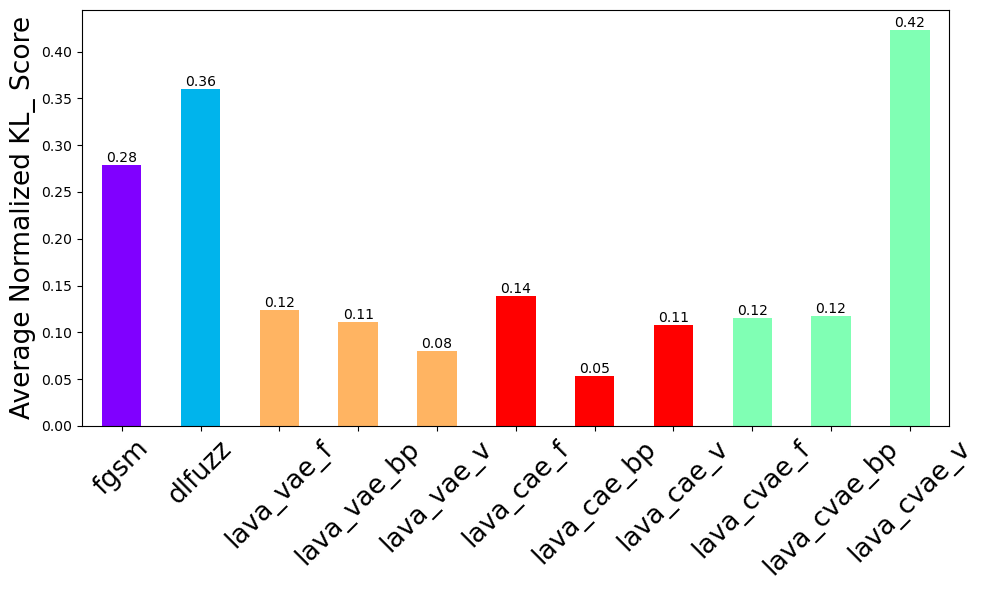

Average Normalized WS_ Scores:
fgsm            0.357281
dlfuzz          0.468506
lava_vae_f      0.229904
lava_vae_bp     0.277638
lava_vae_v      0.252604
lava_cae_f      0.236386
lava_cae_bp     0.215077
lava_cae_v      0.166308
lava_cvae_f     0.194367
lava_cvae_bp    0.232326
lava_cvae_v     0.465366
dtype: float64


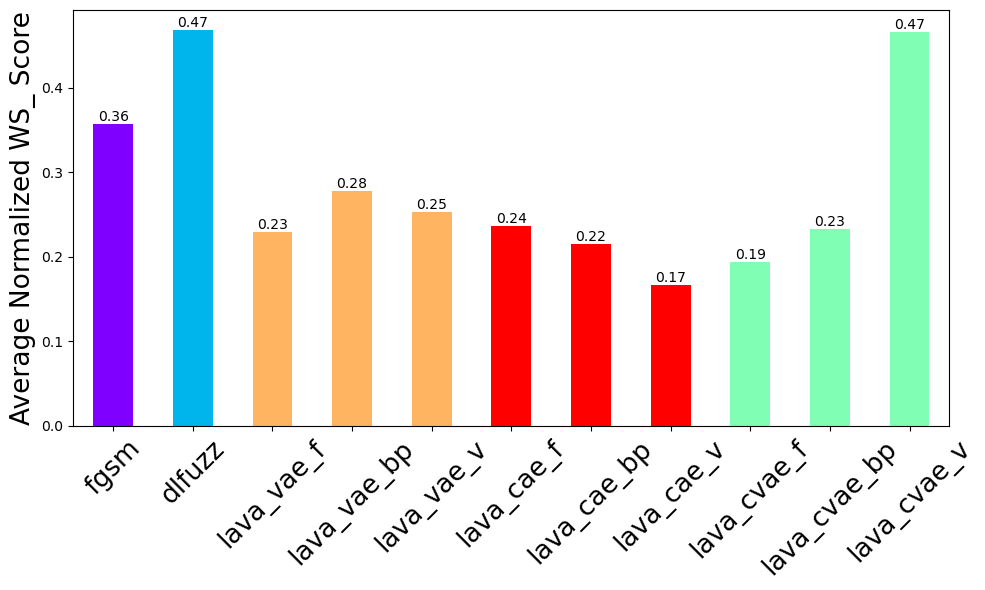

Average Normalized JS_ Scores:
fgsm            0.219899
dlfuzz          0.319630
lava_vae_f      0.138308
lava_vae_bp     0.122142
lava_vae_v      0.088411
lava_cae_f      0.160009
lava_cae_bp     0.062535
lava_cae_v      0.127338
lava_cvae_f     0.114726
lava_cvae_bp    0.119583
lava_cvae_v     0.431282
dtype: float64


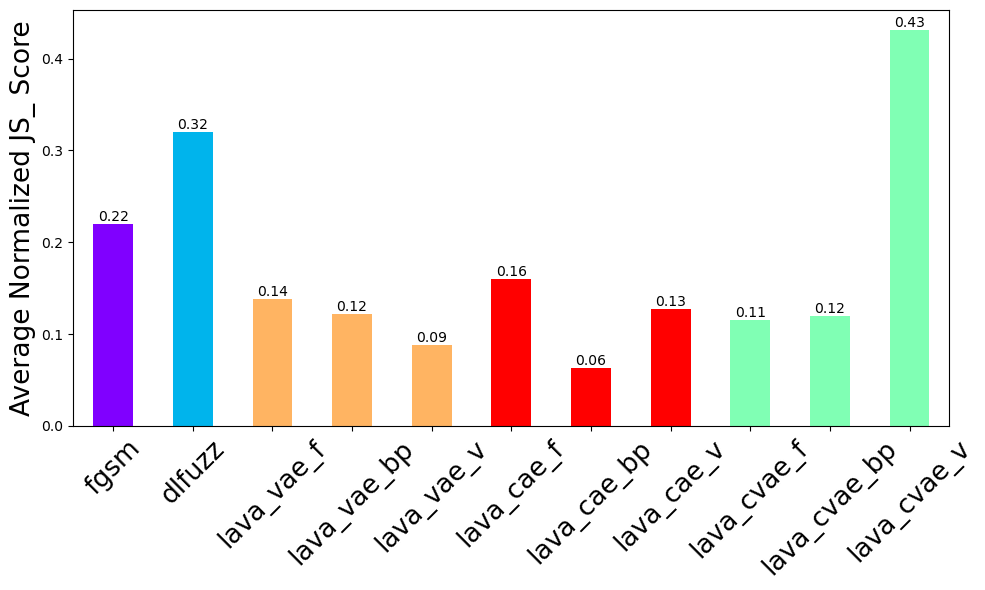

Average Normalized MSE_ Scores:
fgsm            0.326433
dlfuzz          0.375984
lava_vae_f      0.269901
lava_vae_bp     0.266464
lava_vae_v      0.370262
lava_cae_f      0.272039
lava_cae_bp     0.270756
lava_cae_v      0.306215
lava_cvae_f     0.410581
lava_cvae_bp    0.474258
lava_cvae_v     0.492492
dtype: float64


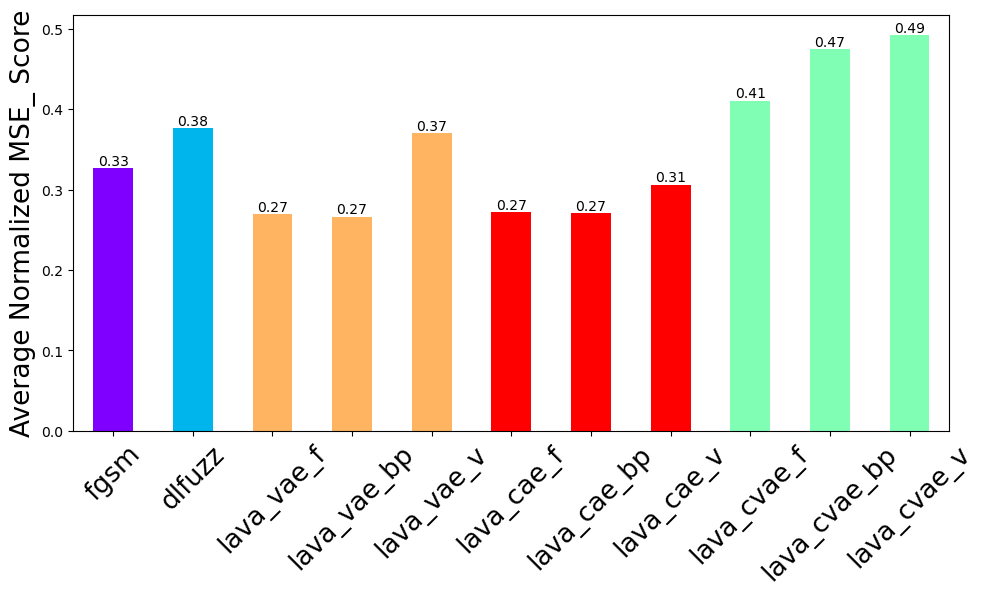

In [17]:
# Define the modified function to normalize and plot data
def normalize_and_plot(data, prefix):
    # Handle NaN values by filling with the column mean for these columns
    data = data.apply(lambda x: x.fillna(x.mean()), axis=0)
    
    # Drop any remaining columns with NaN values if any
    data = data.dropna(axis=1, how='all')
    
    # Apply Min-Max normalization if there are any columns left
    if not data.empty:
        scaler = MinMaxScaler()
        normalized = scaler.fit_transform(data)
        normalized_df = pd.DataFrame(normalized, columns=data.columns)
        
        # Calculate the average of the normalized scores
        average_scores = normalized_df.mean()
        
        # Remove the prefix from the index
        average_scores.index = average_scores.index.str.replace(prefix, '')

        # Rename columns according to the specified rules
        average_scores.index = average_scores.index.str.replace('_forward_gradient', '_f')
        average_scores.index = average_scores.index.str.replace('_bp_gradient', '_bp')
        average_scores.index = average_scores.index.str.replace('_vanilla', '_v')
        
        # Print the average normalized scores
        print(f'Average Normalized {prefix.upper()} Scores:')
        print(average_scores)
        
        # Define a more detailed colormap for different categories
        cmap = cm.get_cmap('rainbow', 5)
        color_mapping = {
            'fgsm': cmap(0),
            'dlfuzz': cmap(1),
            'f': cmap(2),
            'bp': cmap(3),
            'v': cmap(4)
        }

        # Define colors using the colormap based on the categories
        colors = []
        for col in average_scores.index:
            if col == 'fgsm' or col == 'dlfuzz':
                colors.append(color_mapping[col])
            elif 'cvae' in col:
                colors.append(color_mapping['f'])
            elif 'vae' in col:
                colors.append(color_mapping['bp'])
            elif 'cae' in col:
                colors.append(color_mapping['v'])

        # Plotting the average normalized scores as a bar chart
        plt.figure(figsize=(10, 6))
        bars = average_scores.plot(kind='bar', color=colors)
        #plt.title(f'Average Normalized {prefix.upper()} Score for Each Algorithm')
        plt.ylabel(f'Average Normalized {prefix.upper()} Score', fontsize='19')
        #plt.xlabel('Algorithm')
        plt.xticks(rotation=45, fontsize='19')
        #plt.grid(True)
        
        # Adding the value labels on top of the bars
        for bar in bars.patches:
            bars.annotate(f'{bar.get_height():.2f}', 
                          (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                          ha='center', va='bottom')
        
        plt.tight_layout()
        plt.savefig(f'Average Normalized {prefix.upper()} Score.pdf')
        plt.show()
    else:
        print(f"No valid {prefix.upper()} columns available for normalization and plotting.")

# Normalize and plot for KL, WS, JS, and MSE columns
normalize_and_plot(df[[col for col in df.columns if col.startswith('kl_')]], 'kl_')
normalize_and_plot(df[[col for col in df.columns if col.startswith('ws_')]], 'ws_')
normalize_and_plot(df[[col for col in df.columns if col.startswith('js_')]], 'js_')
normalize_and_plot(df[[col for col in df.columns if col.startswith('mse_')]], 'mse_')


Average Normalized KL_ Scores:
fgsm            0.279062
dlfuzz          0.359548
lava_vae_f      0.123698
lava_vae_bp     0.111289
lava_vae_v      0.079880
lava_cae_f      0.139080
lava_cae_bp     0.053628
lava_cae_v      0.107826
lava_cvae_f     0.115020
lava_cvae_bp    0.116979
lava_cvae_v     0.423348
dtype: float64


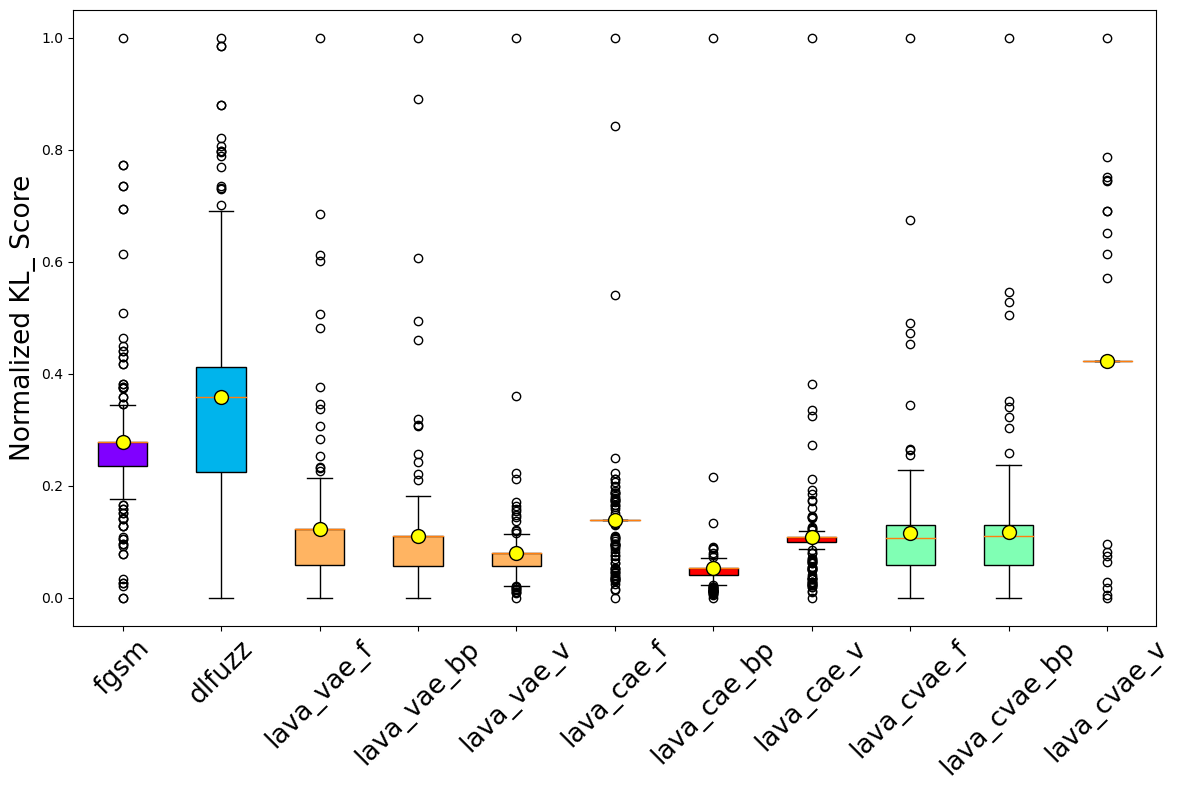

Average Normalized WS_ Scores:
fgsm            0.357281
dlfuzz          0.468506
lava_vae_f      0.229904
lava_vae_bp     0.277638
lava_vae_v      0.252604
lava_cae_f      0.236386
lava_cae_bp     0.215077
lava_cae_v      0.166308
lava_cvae_f     0.194367
lava_cvae_bp    0.232326
lava_cvae_v     0.465366
dtype: float64


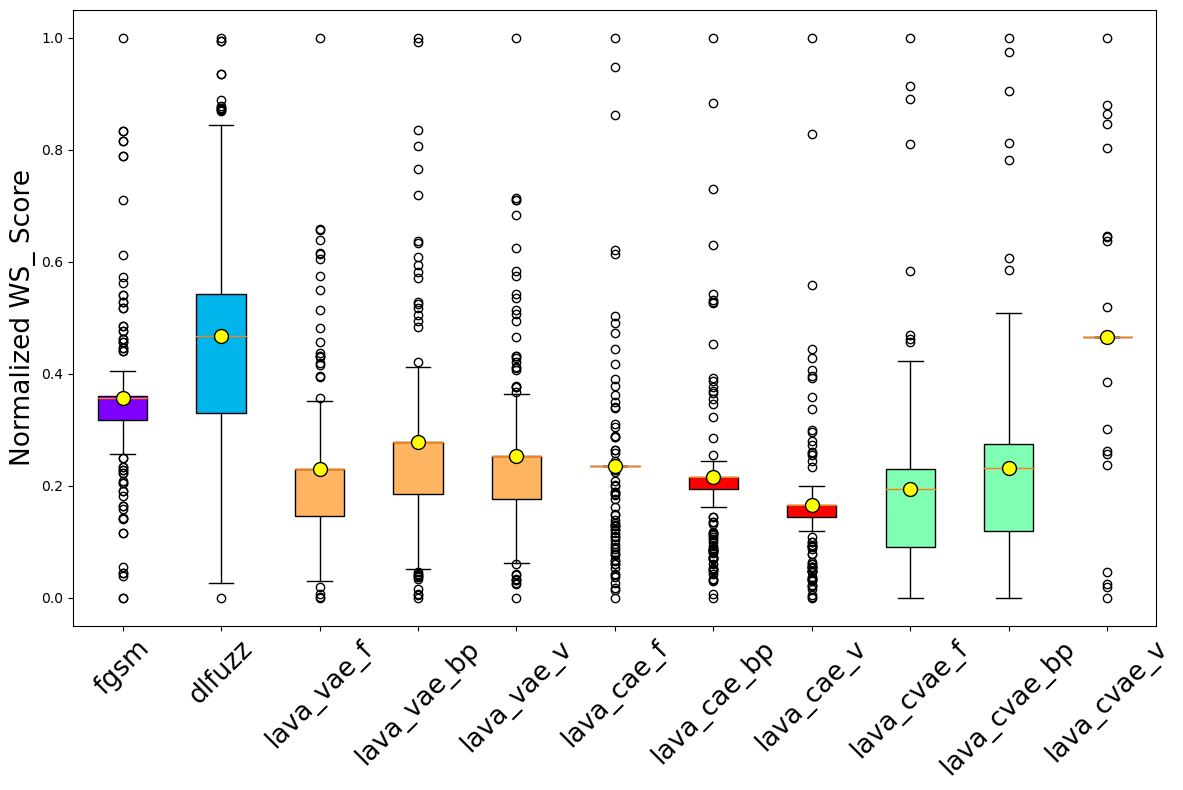

Average Normalized JS_ Scores:
fgsm            0.219899
dlfuzz          0.319630
lava_vae_f      0.138308
lava_vae_bp     0.122142
lava_vae_v      0.088411
lava_cae_f      0.160009
lava_cae_bp     0.062535
lava_cae_v      0.127338
lava_cvae_f     0.114726
lava_cvae_bp    0.119583
lava_cvae_v     0.431282
dtype: float64


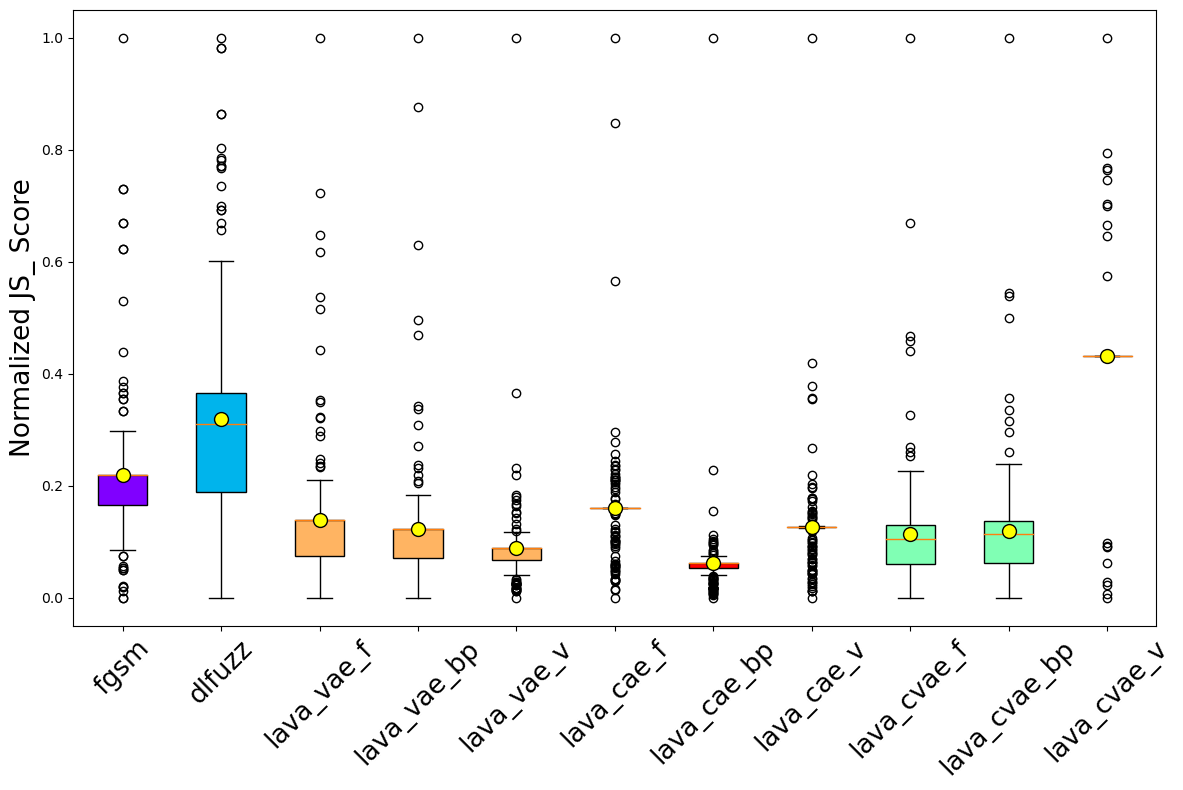

Average Normalized MSE_ Scores:
fgsm            0.326433
dlfuzz          0.375984
lava_vae_f      0.269901
lava_vae_bp     0.266464
lava_vae_v      0.370262
lava_cae_f      0.272039
lava_cae_bp     0.270756
lava_cae_v      0.306215
lava_cvae_f     0.410581
lava_cvae_bp    0.474258
lava_cvae_v     0.492492
dtype: float64


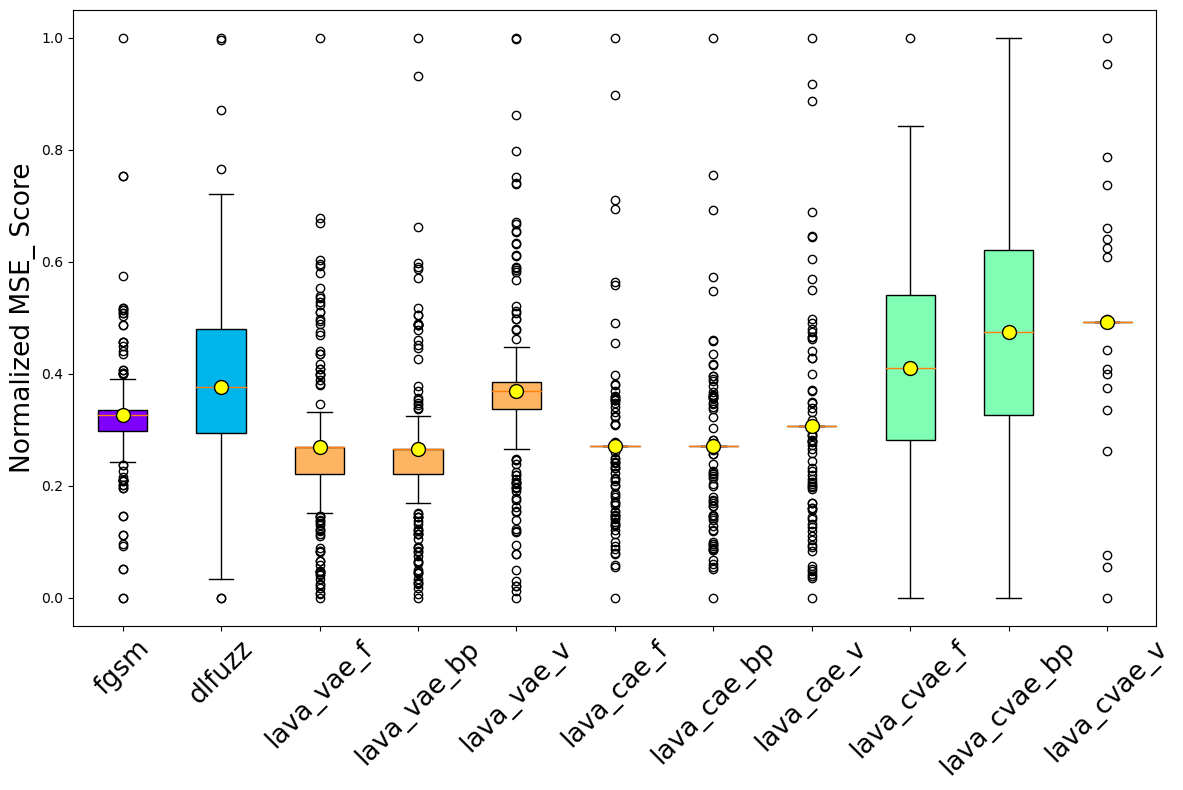

In [52]:
# Define the modified function to normalize and plot data
def normalize_and_plot(data, prefix):
    # Handle NaN values by filling with the column mean for these columns
    data = data.apply(lambda x: x.fillna(x.mean()), axis=0)
    
    # Drop any remaining columns with NaN values if any
    data = data.dropna(axis=1, how='all')
    
    # Apply Min-Max normalization if there are any columns left
    if not data.empty:
        scaler = MinMaxScaler()
        normalized = scaler.fit_transform(data)
        normalized_df = pd.DataFrame(normalized, columns=data.columns)
        
        # Calculate the average of the normalized scores
        average_scores = normalized_df.mean()
        
        # Remove the prefix from the index
        average_scores.index = average_scores.index.str.replace(prefix, '')

        # Rename columns according to the specified rules
        average_scores.index = average_scores.index.str.replace('_forward_gradient', '_f')
        average_scores.index = average_scores.index.str.replace('_bp_gradient', '_bp')
        average_scores.index = average_scores.index.str.replace('_vanilla', '_v')
        
        # Print the average normalized scores
        print(f'Average Normalized {prefix.upper()} Scores:')
        print(average_scores)
        
        # Define a more detailed colormap for different categories
        cmap = cm.get_cmap('rainbow', 5)
        color_mapping = {
            'fgsm': cmap(0),
            'dlfuzz': cmap(1),
            'f': cmap(2),
            'bp': cmap(3),
            'v': cmap(4)
        }

        # Create a box plot for the normalized data
        plt.figure(figsize=(12, 8))
        box_plot = plt.boxplot([normalized_df[col].dropna() for col in normalized_df.columns], patch_artist=True, showmeans=True,
                               meanprops={"marker": "o", 
                                  "markerfacecolor": "yellow", 
                                  "markeredgecolor": "black", 
                                  "markersize": 10},
                               labels=[col.replace(prefix, '').replace('_forward_gradient', '_f').replace('_bp_gradient', '_bp').replace('_vanilla', '_v') for col in normalized_df.columns])

        # Customizing box plot colors
        for i, patch in enumerate(box_plot['boxes']):
            if 'fgsm' in normalized_df.columns[i]:
                patch.set_facecolor(color_mapping['fgsm'])
            elif 'dlfuzz' in normalized_df.columns[i]:
                patch.set_facecolor(color_mapping['dlfuzz'])
            elif 'cvae' in normalized_df.columns[i]:
                patch.set_facecolor(color_mapping['f'])
            elif 'vae' in normalized_df.columns[i]:
                patch.set_facecolor(color_mapping['bp'])
            elif 'cae' in normalized_df.columns[i]:
                patch.set_facecolor(color_mapping['v'])

        # plt.title(f'Box Plot of Normalized {prefix.upper()} Scores for Each Algorithm')
        plt.ylabel(f'Normalized {prefix.upper()} Score', fontsize=19)
        # plt.xlabel('Algorithm')
        plt.xticks(rotation=45, fontsize=19)

        plt.tight_layout()
        plt.savefig(f'Box Plot of Normalized {prefix.upper()} Scores.pdf')
        plt.show()
    else:
        print(f"No valid {prefix.upper()} columns available for normalization and plotting.")

# Normalize and plot for KL, WS, JS, and MSE columns
normalize_and_plot(df[[col for col in df.columns if col.startswith('kl_')]], 'kl_')
normalize_and_plot(df[[col for col in df.columns if col.startswith('ws_')]], 'ws_')
normalize_and_plot(df[[col for col in df.columns if col.startswith('js_')]], 'js_')
normalize_and_plot(df[[col for col in df.columns if col.startswith('mse_')]], 'mse_')
